In [43]:
from optimizers import SGDO as SGD_overthoot
import matplotlib.pyplot as plt
import numpy as np
import torch
from functools import partial


def optimizatino_function(x, y):
    return (10 * x)**2 + y**2
    
def optimization_process(x, y, optimizer, num_steps):    
    models = np.zeros((num_steps, 2))
    gradients = np.zeros((num_steps, 2))
    losses = np.zeros(num_steps)

    for i in range(num_steps):
        models[i] = x.item(), y.item()
        loss = optimizatino_function(x, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        gradients[i] = x.grad, y.grad
        losses[i] = loss.item()
    return models, gradients, losses

def visualize_process(models, title: str, pp, margin: int = 3, resolution: int = 100):    
    mins = np.min(models, axis=0) - margin
    maxes = np.max(models, axis=0) + margin
    xx, yy = np.meshgrid(np.linspace(mins[0], maxes[0], resolution),
                         np.linspace(mins[1], maxes[1], resolution))
    
    pp.contour(xx, yy, optimizatino_function(xx, yy))
    pp.plot(models[:, 0], models[:, 1], '-or')
    pp.set_title(title)
    pp.set_xlabel('x')
    pp.set_ylabel('y')

def get_model():
    x = torch.nn.Parameter(torch.tensor(-4, dtype=torch.float64))
    y = torch.nn.Parameter(torch.tensor(10, dtype=torch.float64))
    return [x, y]



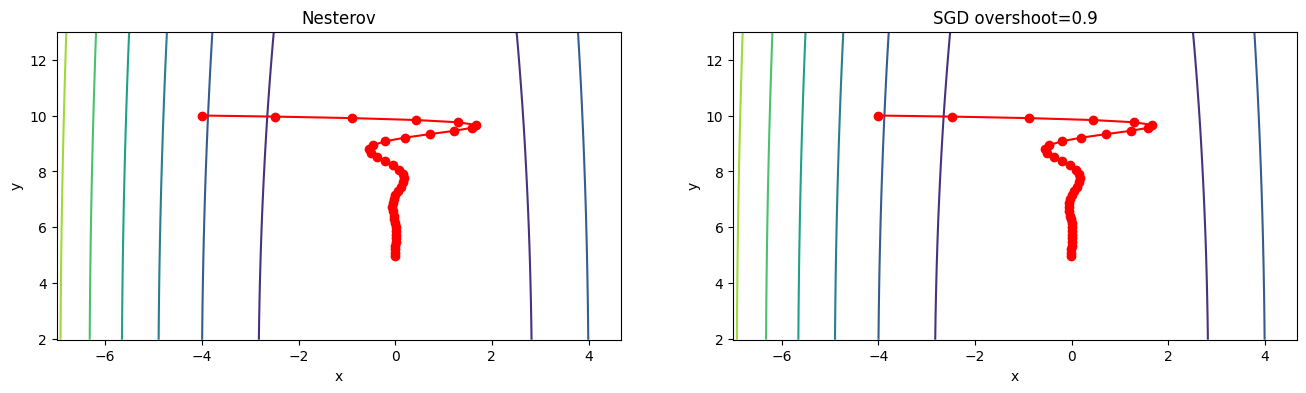

In [44]:



momentum = 0.9
fig, axs = plt.subplots(1, 2, figsize=(16, 4))


optimizers = {
    # "SGD": partial(torch.optim.SGD, momentum = momentum),
    "Nesterov": partial(torch.optim.SGD, momentum = momentum, nesterov=True),
    "SGD overshoot=0.9": partial(SGD_overthoot, momentum = momentum, overshoot=momentum),
}

for i, (name, optimizer) in enumerate(optimizers.items()):
    model = get_model()
    sgd_models, sgd_gradients, sgd_losses = optimization_process(model[0], model[1], optimizer=optimizer(model), num_steps=40)
    visualize_process(sgd_models, name,  axs[i])

plt.show()
